In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import datetime
import os

In [12]:
defense_stats = pd.read_parquet('newdefensedata.parquet')

In [16]:

# cols_to_drop = [['FGA_FREQUENCY, TS_PCT']]
defense_stats = defense_stats.drop(columns=['FGA_FREQUENCY'])
defense_stats.columns

Index(['TEAM_ID', 'EFG_PCT', 'FTA_RATE', 'OREB_PCT', 'OPP_EFG_PCT',
       'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'FG2A_FREQUENCY',
       'FG3A_FREQUENCY', 'OFF_RATING', 'NET_RATING', 'AST_PCT', 'TS_PCT',
       'PACE', 'PIE', 'CONTESTED_SHOTS_PER100', 'CONTESTED_SHOTS_3PT_PER100',
       'DEFLECTIONS_PER100', 'CHARGES_DRAWN_PER100', 'DEF_BOXOUTS_PER100',
       'DEF_LOOSE_BALLS_RECOVERED_PER100', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE',
       'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE',
       'OPP_PTS_FB', 'OPP_PTS_PAINT'],
      dtype='object')

In [17]:
defense_stats_clean = defense_stats.drop(columns=['TS_PCT'])
defense_stats_clean.columns

Index(['TEAM_ID', 'EFG_PCT', 'FTA_RATE', 'OREB_PCT', 'OPP_EFG_PCT',
       'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'FG2A_FREQUENCY',
       'FG3A_FREQUENCY', 'OFF_RATING', 'NET_RATING', 'AST_PCT', 'PACE', 'PIE',
       'CONTESTED_SHOTS_PER100', 'CONTESTED_SHOTS_3PT_PER100',
       'DEFLECTIONS_PER100', 'CHARGES_DRAWN_PER100', 'DEF_BOXOUTS_PER100',
       'DEF_LOOSE_BALLS_RECOVERED_PER100', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE',
       'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE',
       'OPP_PTS_FB', 'OPP_PTS_PAINT'],
      dtype='object')

In [18]:
features = defense_stats_clean.drop(columns=["TEAM_ID"])
scaler = StandardScaler()
X = scaler.fit_transform(features)

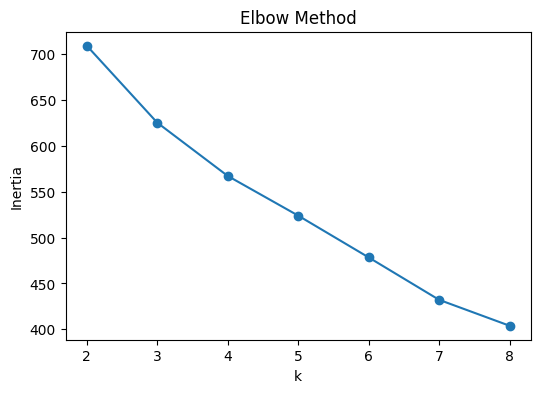

In [19]:
##want score to be lower

k_range = range(2, 9)


inertias = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        n_init=25,
        random_state=42
    )
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


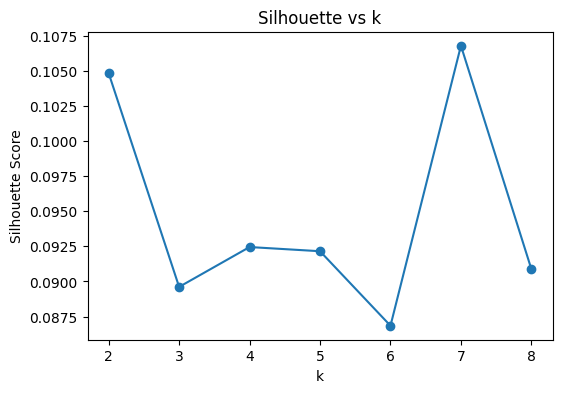

In [20]:

sil_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=25, random_state=42)
    labels = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))


plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs k")
plt.show()


In [22]:
k = 5
km = KMeans(n_clusters=k, n_init=25, random_state=42)
defense_stats_clean['cluster'] = km.fit_predict(X)

centroids = pd.DataFrame(
    scaler.inverse_transform(km.cluster_centers_),
    columns=features.columns
)

centroids


,EFG_PCT,FTA_RATE,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,FG2A_FREQUENCY,FG3A_FREQUENCY,OFF_RATING,...,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT
0,0.545100,0.283200,0.322100,0.538700,0.261900,0.139800,0.300900,0.602200,0.397800,116.150000,...,4.455691,2.339301,17.300000,15.650000,15.150000,50.000000,17.550000,14.360000,15.160000,49.810000
1,0.538143,0.258429,0.298286,0.551857,0.263143,0.143429,0.303429,0.568143,0.431857,113.371429,...,5.374740,2.292947,17.385714,14.485714,16.228571,51.671429,17.714286,15.300000,14.942857,49.900000
2,0.553500,0.257500,0.320750,0.527000,0.285750,0.156250,0.305250,0.556750,0.443250,118.650000,...,5.557718,2.831171,20.150000,16.325000,15.175000,50.250000,16.100000,14.750000,13.650000,42.450000
3,0.523333,0.259333,0.281667,0.553000,0.292000,0.136333,0.322000,0.602000,0.398000,108.966667,...,4.678090,1.888917,15.733333,13.466667,14.066667,46.133333,18.233333,16.266667,14.766667,53.333333
4,0.553333,0.270833,0.296333,0.549167,0.264833,0.149833,0.316333,0.587500,0.412500,114.733333,...,4.666781,2.499131,18.566667,14.350000,13.350000,45.900000,19.300000,15.083333,15.650000,49.900000


In [23]:
cluster_means = (
    defense_stats_clean
    .groupby("cluster")
    .mean(numeric_only=True)
)


In [25]:
defense_stats_clean.sort_values("cluster")

,TEAM_ID,EFG_PCT,FTA_RATE,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,FG2A_FREQUENCY,FG3A_FREQUENCY,...,DEF_LOOSE_BALLS_RECOVERED_PER100,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,cluster
26,1610612759,0.548,0.292,0.305,0.533,0.243,0.135,0.281,0.585,0.415,...,2.174129,17.3,15.8,15.3,49.5,15.6,13.2,12.6,45.7,0
3,1610612766,0.547,0.257,0.348,0.555,0.230,0.125,0.277,0.601,0.399,...,2.021019,15.4,17.3,13.1,48.6,19.4,14.5,15.9,52.5,0
24,1610612757,0.528,0.301,0.348,0.542,0.283,0.149,0.320,0.602,0.398,...,1.962131,18.6,17.4,13.6,47.1,20.5,14.8,16.3,49.6,0
5,1610612739,0.551,0.252,0.302,0.547,0.276,0.154,0.309,0.589,0.411,...,2.424242,19.0,15.3,15.2,48.8,17.7,14.0,16.0,45.4,0
6,1610612742,0.536,0.278,0.275,0.525,0.246,0.133,0.303,0.623,0.377,...,2.952102,15.7,11.9,18.1,51.5,17.4,14.8,15.0,54.0,0
7,1610612743,0.580,0.288,0.283,0.543,0.258,0.121,0.302,0.589,0.411,...,2.178957,14.2,13.9,15.1,49.1,16.5,14.4,15.3,51.3,0
22,1610612755,0.527,0.283,0.319,0.534,0.268,0.150,0.326,0.600,0.400,...,2.630000,18.6,15.6,15.8,47.5,16.7,15.1,16.7,49.9,0
21,1610612753,0.528,0.312,0.323,0.544,0.280,0.147,0.292,0.624,0.376,...,2.462761,18.1,15.6,16.3,53.6,16.2,13.4,15.7,51.2,0
10,1610612745,0.541,0.274,0.410,0.534,0.259,0.137,0.296,0.598,0.402,...,2.355129,18.0,19.2,14.4,54.3,18.7,15.8,14.5,49.2,0
17,1610612750,0.565,0.295,0.308,0.530,0.276,0.147,0.303,0.611,0.389,...,2.232540,18.1,14.5,14.6,50.0,16.8,13.6,13.6,49.3,0


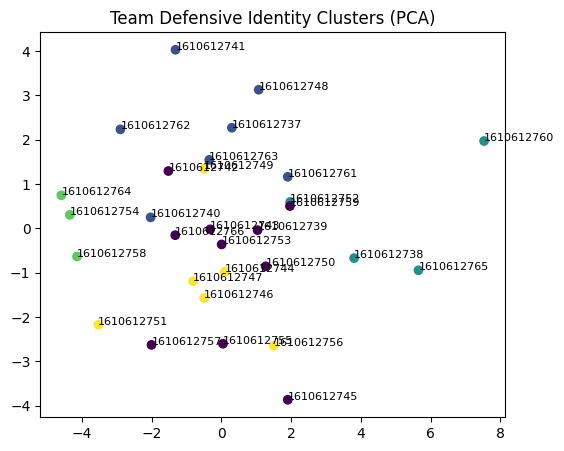

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=defense_stats_clean["cluster"])
for i, name in enumerate(defense_stats_clean["TEAM_ID"]):
    plt.text(X_pca[i,0], X_pca[i,1], name, fontsize=8)
plt.title("Team Defensive Identity Clusters (PCA)")
plt.show()


In [27]:
defense_stats_clean.to_parquet('jan21clusters.parquet' )